In [1]:
# Importation des modules Python.
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, balanced_accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
#from fastai.tabular.all import *

In [2]:
# Mount du GoogleDrive.
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/OLIST'

path = os.getcwd()
print(f"Le répertoire courant est : {path} \n")

Mounted at /content/drive
/content/drive/MyDrive/OLIST
Le répertoire courant est : /content/drive/MyDrive/OLIST 



In [3]:
# Import de la table de données RFM.
df = pd.read_csv('recency_frequency_monetary.csv', index_col=False)
df.head()

,customer_unique_id,recency,frequency,monetary_value
0,0000366f3b9a7992bf8c76cfdf3221e2,235,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,238,1,18.90
2,0000f46a3911fa3c0805444483337064,661,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,445,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,412,1,180.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  96096 non-null  object 
 1   recency             96096 non-null  int64  
 2   frequency           96096 non-null  int64  
 3   monetary_value      95420 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ MB


In [6]:
del df['customer_unique_id']
# Imputation des valeurs manquantes
imputer = KNNImputer(n_neighbors=2)
dfi = imputer.fit_transform(df)
dfi

array([[235.  ,   1.  , 129.9 ],
       [238.  ,   1.  ,  18.9 ],
       [661.  ,   1.  ,  69.  ],
       ...,
       [692.  ,   1.  ,  89.9 ],
       [243.  ,   1.  , 115.  ],
       [608.  ,   1.  ,  56.99]])

In [7]:
# Scaling des variables
scaler = StandardScaler()
dfis = scaler.fit_transform(dfi)
dfis

array([[-0.83503622, -0.16236828, -0.05831343],
       [-0.81548168, -0.16236828, -0.56851156],
       [ 1.9417083 , -0.16236828, -0.33823294],
       ...,
       [ 2.14377187, -0.16236828, -0.24216861],
       [-0.78289079, -0.16236828, -0.12679948],
       [ 1.59624478, -0.16236828, -0.39343546]])

In [8]:
# Détermination du meilleur k avec la Méthode du Coude.
inertias = [] 
K = range(1,10) 

for k in K: 
  #Build / Fit the model 
  model_kmean = KMeans(n_clusters=k).fit(dfis) 
  
  # Store inertia in a list
  inertias.append(model_kmean.inertia_) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

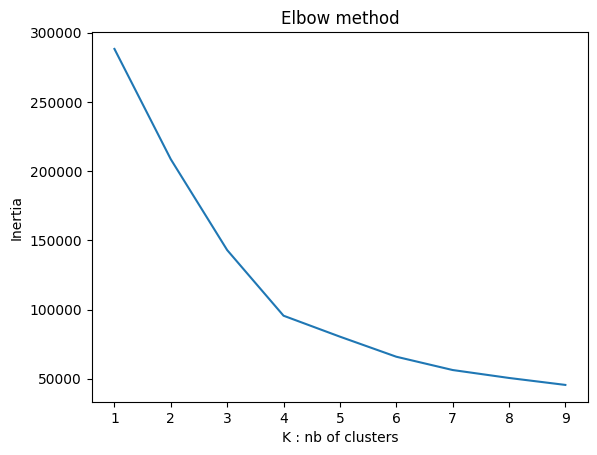

In [9]:
# Affichage de l'inertie en fonction des valeurs de k.
plt.title("Elbow method")
plt.xlabel("K : nb of clusters")
plt.ylabel("Inertia")
plt.plot(K, inertias)
plt.show()

In [10]:
# Détermination du meilleur k avec la Silhouette.
silhouette = [] 
K = range(2,10) 

for k in K: 
  #Build / Fit the model 
  model_kmean = KMeans(n_clusters=k).fit(dfis) 

  # Labels of clusters
  labels = model_kmean.labels_

  # Store inertia in a list
  silhouette.append(metrics.silhouette_score(dfis, labels, metric='euclidean')) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

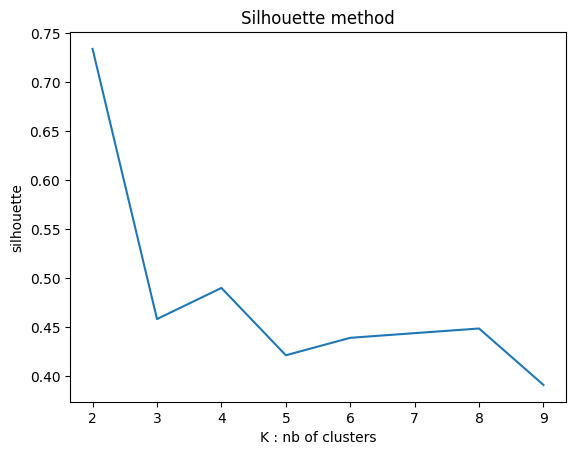

In [11]:
# Affichage du score en fonction des valeurs de k.
plt.title("Silhouette method")
plt.xlabel("K : nb of clusters")
plt.ylabel("silhouette")
plt.plot(K, silhouette)
plt.show()

In [12]:
# Clustering avec la meilleure valeur k = 4.
model_kmean4 = KMeans(n_clusters=4).fit(dfis) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
model_kmean4.fit_predict(dfis)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 3, ..., 3, 0, 3], dtype=int32)

In [14]:
# Ajout d'une colonne indiquant l'appartenance au cluster 0, 1, 2, ou 3.
df['cluster'] = model_kmean4.labels_
df.head()

,recency,frequency,monetary_value,cluster
0,235,1,129.90,0
1,238,1,18.90,0
2,661,1,69.00,3
3,445,1,25.99,3
4,412,1,180.00,3


In [15]:
# Aggrégation par cluster avec par exemple la valeur médiane : l'interprétation est très difficile, d'où l'utilisation de Dataiku pour poursuivre l'analyse.
dfc = df.groupby(['cluster']).median()
dfc

,recency,frequency,monetary_value
cluster,,,
0,255.0,1.0,84.90
1,348.0,1.0,907.86
2,323.0,2.0,179.45
3,501.0,1.0,82.95
